#**GATHERING DATA**

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
df_raw = pd.read_excel("Assessment.xlsx")

In [219]:
df_raw.head()

,Date,Primary Producer,Stage Name,Account Name,Opportunity Name,Niche Affiliations,Expected Decision Date,Annual Revenue,Unnamed: 8,Primary Producer.1,Office,Unnamed: 11,Unnamed: 12,Unnamed: 13,Account Name.1,Acct ID,Primary Office
0,28/06/2018,Producer1,"1-Met Client,Data Gather,Insurer Market",West Point Construction Ltd,Meeting 06/03/2019,Construction,01/07/2019,20000.0,NaN,Producer1,Office 1,NaN,NaN,NaN,West Point Construction Ltd,A101,Office 1
1,16/11/2017,Producer2,"1-Met Client,Data Gather,Insurer Market",Newmor Group Limited,2019 Review,Commercial - All Other,31/12/2019,10000.0,NaN,Producer2,Office 2,NaN,NaN,NaN,Newmor Group Limited,A102,Office 2
2,10/11/2017,Producer2,2-Client Presentation-Await Feedback,Prohire Plc,Review - 2019,Transportation,04/06/2019,10000.0,NaN,Producer3,Office 3,NaN,NaN,NaN,Prohire Plc,A103,Office 2
3,06/12/2017,Producer2,"1-Met Client,Data Gather,Insurer Market",G T Access Ltd,First Meeting - Review 2019,Other,30/11/2019,8000.0,NaN,Producer4,Office 1,NaN,NaN,NaN,G T Access Ltd,A104,Office 2
4,29/04/2019,Producer2,2-Client Presentation-Await Feedback,Arh Group Ltd,Insurance Review,Commercial - All Other,28/06/2019,25000.0,NaN,Producer5,Office 2,NaN,NaN,NaN,Arh Group Ltd,A105,Office 2


In [220]:
df1 = df_raw.iloc[:,:8]

In [221]:
df2 = df_raw.iloc[:5,9:11]

In [222]:
df3 = df_raw.iloc[:77,14:]

In [223]:
df3.rename(columns = {'Primary Office':'Office', 'Account Name.1':'Account Name'}, inplace = True)
df2.rename(columns = {'Primary Producer.1':'Primary Producer'}, inplace = True)

In [224]:
df_merge12 = pd.merge(df1, df2, how= "inner", on = "Primary Producer")

In [225]:
df = pd.merge(df_merge12, df3, how= "inner", on = "Account Name")

In [226]:
df.shape

(180, 11)

#**DATA PRE-PROCESSING**

In [227]:
df.head()

,Date,Primary Producer,Stage Name,Account Name,Opportunity Name,Niche Affiliations,Expected Decision Date,Annual Revenue,Office_x,Acct ID,Office_y
0,28/06/2018,Producer1,"1-Met Client,Data Gather,Insurer Market",West Point Construction Ltd,Meeting 06/03/2019,Construction,01/07/2019,20000.0,Office 1,A101,Office 1
1,28/06/2018,Producer1,"1-Met Client,Data Gather,Insurer Market",West Point Construction Ltd,Meeting 06/03/2019,Construction,01/07/2019,20000.0,Office 1,A101,Office 1
2,16/11/2017,Producer2,"1-Met Client,Data Gather,Insurer Market",Newmor Group Limited,2019 Review,Commercial - All Other,31/12/2019,10000.0,Office 2,A102,Office 2
3,16/11/2017,Producer2,"1-Met Client,Data Gather,Insurer Market",Newmor Group Limited,2019 Review,Commercial - All Other,31/12/2019,10000.0,Office 2,A102,Office 2
4,10/11/2017,Producer2,2-Client Presentation-Await Feedback,Prohire Plc,Review - 2019,Transportation,04/06/2019,10000.0,Office 2,A103,Office 2


In [228]:
df.describe()

,Annual Revenue
count,174.000000
mean,7694.255287
std,6458.578786
min,157.520000
25%,3751.827500
50%,5000.000000
75%,10000.000000
max,30000.000000


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    180 non-null    object 
 1   Primary Producer        180 non-null    object 
 2   Stage Name              180 non-null    object 
 3   Account Name            180 non-null    object 
 4   Opportunity Name        180 non-null    object 
 5   Niche Affiliations      162 non-null    object 
 6   Expected Decision Date  180 non-null    object 
 7   Annual Revenue          174 non-null    float64
 8   Office_x                180 non-null    object 
 9   Acct ID                 180 non-null    object 
 10  Office_y                180 non-null    object 
dtypes: float64(1), object(10)
memory usage: 16.9+ KB


In [230]:
df.isnull().mean()*100

Date                       0.000000
Primary Producer           0.000000
Stage Name                 0.000000
Account Name               0.000000
Opportunity Name           0.000000
Niche Affiliations        10.000000
Expected Decision Date     0.000000
Annual Revenue             3.333333
Office_x                   0.000000
Acct ID                    0.000000
Office_y                   0.000000
dtype: float64

In [231]:
df.nunique()

Date                      46
Primary Producer           5
Stage Name                 3
Account Name              77
Opportunity Name          65
Niche Affiliations        18
Expected Decision Date    56
Annual Revenue            45
Office_x                   3
Acct ID                   77
Office_y                   3
dtype: int64

#**FEATURE ENGINEERING**

In [232]:
df.head()

,Date,Primary Producer,Stage Name,Account Name,Opportunity Name,Niche Affiliations,Expected Decision Date,Annual Revenue,Office_x,Acct ID,Office_y
0,28/06/2018,Producer1,"1-Met Client,Data Gather,Insurer Market",West Point Construction Ltd,Meeting 06/03/2019,Construction,01/07/2019,20000.0,Office 1,A101,Office 1
1,28/06/2018,Producer1,"1-Met Client,Data Gather,Insurer Market",West Point Construction Ltd,Meeting 06/03/2019,Construction,01/07/2019,20000.0,Office 1,A101,Office 1
2,16/11/2017,Producer2,"1-Met Client,Data Gather,Insurer Market",Newmor Group Limited,2019 Review,Commercial - All Other,31/12/2019,10000.0,Office 2,A102,Office 2
3,16/11/2017,Producer2,"1-Met Client,Data Gather,Insurer Market",Newmor Group Limited,2019 Review,Commercial - All Other,31/12/2019,10000.0,Office 2,A102,Office 2
4,10/11/2017,Producer2,2-Client Presentation-Await Feedback,Prohire Plc,Review - 2019,Transportation,04/06/2019,10000.0,Office 2,A103,Office 2


#####Column : Date

In [233]:
df[["new_Date", "new_Date1"]]= df["Date"].str.split("/",n=1, expand = True)

In [234]:
df.dropna(inplace=True)

In [235]:
df.drop(["new_Date", "new_Date1"], axis = 1, inplace = True)

In [236]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

#####Column : Expected Decision Date

In [237]:
df[["new__exp_Date", "new_exp_Date1"]]= df["Expected Decision Date"].str.split("/",n=1, expand = True)

In [238]:
df.dropna(inplace = True)

In [239]:
df.drop(["new__exp_Date", "new_exp_Date1"], axis = 1, inplace = True)

In [240]:
df['Expected Decision Date'] = pd.to_datetime(df['Expected Decision Date'], format='%d/%m/%Y')

#####Column : Office_y

In [241]:
df.drop(['Office_y'], axis=1, inplace =True)

#####Column : Annual Revenue

<Axes: >

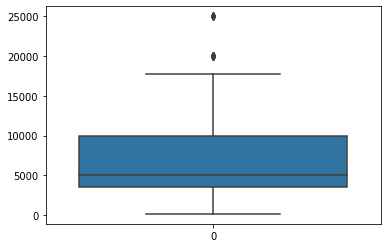

In [242]:
sns.boxplot(df["Annual Revenue"])

<Axes: xlabel='Annual Revenue', ylabel='Count'>

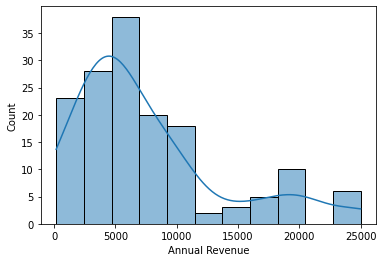

In [243]:
sns.histplot(df["Annual Revenue"], kde = True)

In [244]:
q3 = df["Annual Revenue"].quantile(0.75)
q1 = df["Annual Revenue"].quantile(0.25)
iqr = q3-q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)

for i in df["Annual Revenue"]:
  if i > upper:
    df["Annual Revenue"].replace(i,df["Annual Revenue"].median(), inplace = True)
# df.drop(df[(df["Annual Revenue"]>upper)].index, inplace=True)

#####New Column : Time_Period

In [245]:
df["time_period"] = df["Expected Decision Date"] - df["Date"]

In [246]:
days = []
for i in df["time_period"]:
  days.append(str(i).split(" "))
df[["days", "raw", "time"]] = days

Days=[]
for i in df["days"]:
  Days.append(int(i))

In [247]:
df.drop(["Date", "Expected Decision Date", "raw", "time", "time_period"], axis = 1, inplace = True)

#**EXPLORATORY DATA ANALYSIS**

In [248]:
df.head()

,Primary Producer,Stage Name,Account Name,Opportunity Name,Niche Affiliations,Annual Revenue,Office_x,Acct ID,days
0,Producer1,"1-Met Client,Data Gather,Insurer Market",West Point Construction Ltd,Meeting 06/03/2019,Construction,5000.0,Office 1,A101,368
1,Producer1,"1-Met Client,Data Gather,Insurer Market",West Point Construction Ltd,Meeting 06/03/2019,Construction,5000.0,Office 1,A101,368
2,Producer2,"1-Met Client,Data Gather,Insurer Market",Newmor Group Limited,2019 Review,Commercial - All Other,10000.0,Office 2,A102,775
3,Producer2,"1-Met Client,Data Gather,Insurer Market",Newmor Group Limited,2019 Review,Commercial - All Other,10000.0,Office 2,A102,775
4,Producer2,2-Client Presentation-Await Feedback,Prohire Plc,Review - 2019,Transportation,10000.0,Office 2,A103,571


          Primary Producer
Office_x                  
Office 1                29
Office 2                62
Office 3                62


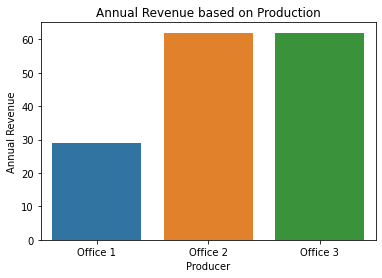

In [274]:
print(df[["Primary Producer"]].groupby(df["Office_x"]).count())

data1 = df[["Primary Producer", "Office_x"]].groupby(['Office_x'], as_index=False).count()
sns.barplot(y = "Primary Producer", x = "Office_x", data = data1)
plt.title("Annual Revenue based on Production")
plt.xlabel("Producer")
plt.ylabel("Annual Revenue")
plt.show()

Primary Producer
Producer1    5000.000000
Producer2    6619.047619
Producer3    4933.870968
Producer4    4912.798519
Producer5    7287.772195
Name: Annual Revenue, dtype: float64


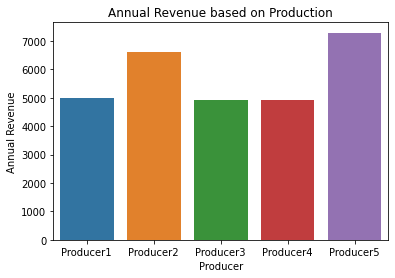

In [279]:
print(df["Annual Revenue"].groupby(df["Primary Producer"]).mean())

exp1 = df[["Annual Revenue", "Primary Producer"]].groupby(["Primary Producer"], as_index=False).mean()
sns.barplot(x = "Primary Producer", y = "Annual Revenue", data = exp1)
plt.title("Annual Revenue based on Production")
plt.xlabel("Producer")
plt.ylabel("Annual Revenue")
plt.show()

                  Stage Name  Account Name  Opportunity Name  \
Primary Producer                                               
Producer1                  2             2                 2   
Producer2                 21            21                21   
Producer3                 62            62                62   
Producer4                 27            27                27   
Producer5                 41            41                41   

                  Niche Affiliations  
Primary Producer                      
Producer1                          2  
Producer2                         21  
Producer3                         62  
Producer4                         27  
Producer5                         41  


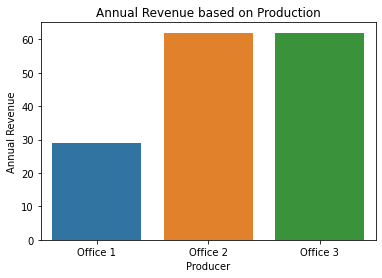

In [291]:
print(df[["Stage Name", "Account Name", "Opportunity Name", "Niche Affiliations"]].groupby(df["Primary Producer"]).count())

data2 = df[["Stage Name", "Account Name", "Opportunity Name", "Niche Affiliations", "Office_x"]].groupby(['Office_x'], as_index=False).count()
sns.barplot(y = "Stage Name", x = "Office_x", data = data2)
plt.title("Annual Revenue based on Production")
plt.xlabel("Producer")
plt.ylabel("Annual Revenue")
plt.show()

In [206]:
df[["Stage Name", "Account Name", "Opportunity Name", "Niche Affiliations"]].groupby(df["Office_x"]).count()

,Stage Name,Account Name,Opportunity Name,Niche Affiliations
Office_x,,,,
Office 1,29,29,29,29
Office 2,62,62,62,62
Office 3,62,62,62,62


          Annual Revenue
Office_x                
Office 1     4918.812414
Office 2     7061.268710
Office 3     4933.870968


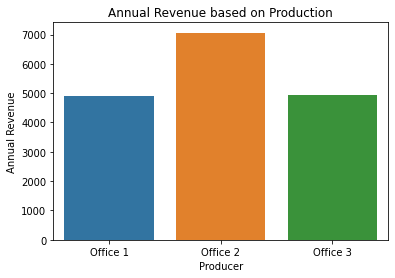

In [290]:
print(df[["Annual Revenue", "Office_x"]].groupby(["Office_x"]).mean())

exp2 = df[["Annual Revenue", "Office_x"]].groupby(["Office_x"], as_index=False).mean()
sns.barplot(x = "Office_x", y = "Annual Revenue", data = exp2)
plt.title("Annual Revenue based on Production")
plt.xlabel("Producer")
plt.ylabel("Annual Revenue")
plt.show()

<Axes: xlabel='days', ylabel='Annual Revenue'>

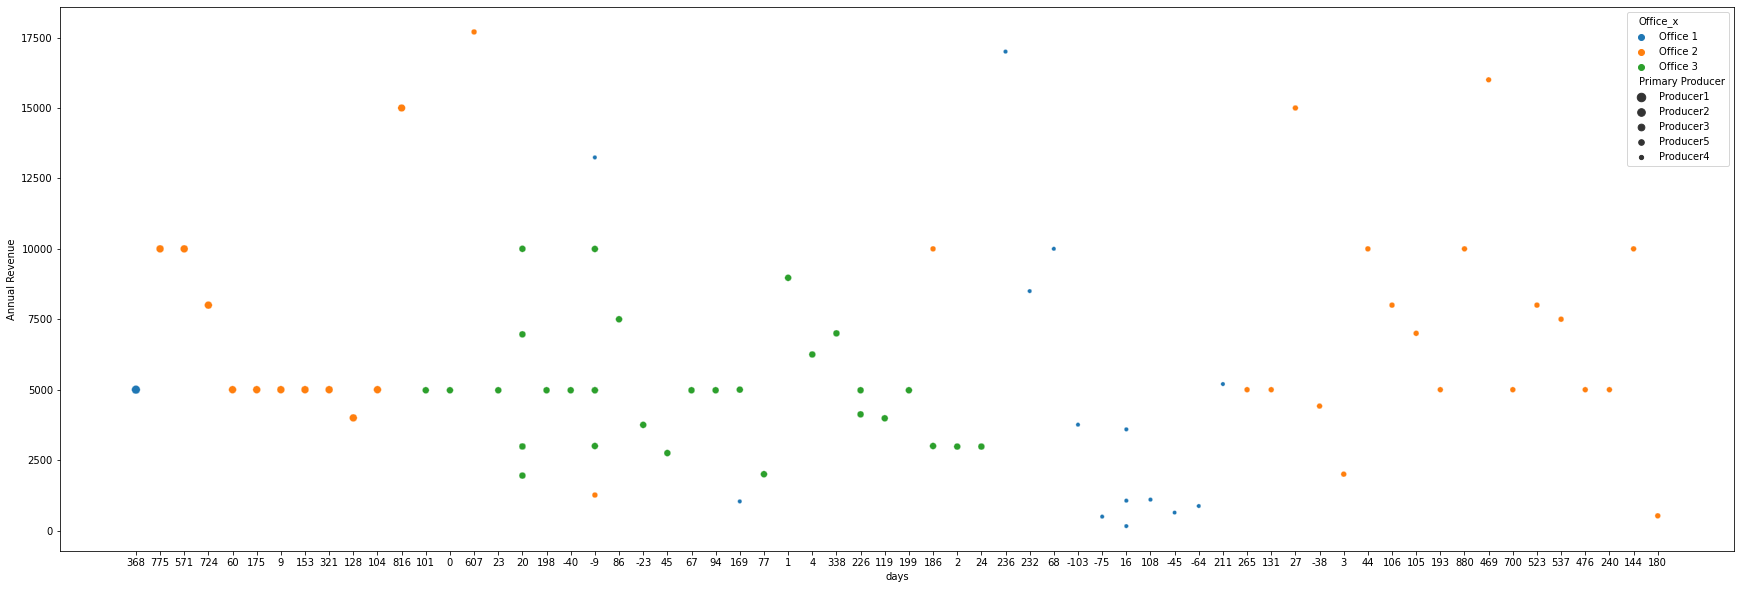

In [193]:
plt.figure(figsize=(30,10))
sns.scatterplot(y = df['Annual Revenue'],x = (df["days"]), hue = df["Office_x"], size = df["Primary Producer"])